In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py", line 730, in _input_request
    ident, reply = self.session.recv(self.stdin_socket, 0)
  File "/usr/local/lib/python3.6/dist-packages/jupyter_client/session.py", line 803, in recv
    msg_list = socket.recv_multipart(mode, copy=copy)
  File "/usr/local/lib/python3.6/dist-packages/zmq/sugar/socket.py", line 466, in recv_multipart
    parts = [self.recv(flags, copy=copy, track=track)]
  File "zmq/backend/cython/socket.pyx", line 790, in zmq.backend.cython.socket.Socket.recv
  File "zmq/backend/cython/socket.pyx", line 826, in zmq.backend.cython.socket.Socket.recv
  File "zmq/backend/cython/socket.pyx", line 188, in zmq.backend.cython.socket._recv_copy
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/li

TypeError: ignored

In [2]:
import numpy as np
import keras
from keras_preprocessing import image
from PIL import Image
import cv2


def random_flip(img, mask, u=0.5):
    if np.random.random() < u:
        img = image.flip_axis(img, 1)
        mask = image.flip_axis(mask, 1)
    if np.random.random() < u:
        img = image.flip_axis(img, 0)
        mask = image.flip_axis(mask, 0)
    return img, mask

def random_rotate(img, mask, rotate_limit=(-20, 20), u=0.5):
    if np.random.random() < u:
        theta = np.random.uniform(rotate_limit[0], rotate_limit[1])
        img = image.apply_affine_transform(img, theta=theta)
        mask = image.apply_affine_transform(mask, theta=theta)
    return img, mask

def shift(x, wshift, hshift, row_axis=0, col_axis=1, channel_axis=2, fill_mode='nearest', cval=0.):
    h, w = x.shape[row_axis], x.shape[col_axis]
    tx = hshift * h
    ty = wshift * w
    x = image.apply_affine_transform(x, ty=ty, tx=tx)
    return x

def random_shift(img, mask, w_limit=(-0.1, 0.1), h_limit=(-0.1, 0.1), u=0.5):
    if np.random.random() < u:
        wshift = np.random.uniform(w_limit[0], w_limit[1])
        hshift = np.random.uniform(h_limit[0], h_limit[1])
        img = shift(img, wshift, hshift)
        mask = shift(mask, wshift, hshift)
    return img, mask

def random_zoom(img, mask, zoom_range=(0.8, 1), u=0.5):
    if np.random.random() < u:
        zx, zy = np.random.uniform(zoom_range[0], zoom_range[1], 2)
        img = image.apply_affine_transform(img, zx=zx, zy=zy)
        mask = image.apply_affine_transform(mask, zx=zx, zy=zy)
    return img, mask



def random_shear(img, mask, intensity_range=(-0.5, 0.5), u=0.5):
    if np.random.random() < u:
        sh = np.random.uniform(-intensity_range[0], intensity_range[1])
        img = image.apply_affine_transform(img, shear=sh)
        mask = image.apply_affine_transform(mask, shear=sh)
    return img, mask

def random_gray(img, u=0.5):
    if np.random.random() < u:
        coef = np.array([[[0.114, 0.587, 0.299]]])  # rgb to gray (YCbCr)
        gray = np.sum(img * coef, axis=2)
        img = np.dstack((gray, gray, gray))
    return img

def random_contrast(img, limit=(-0.3, 0.3), u=0.5):
    if np.random.random() < u:
        alpha = 1.0 + np.random.uniform(limit[0], limit[1])
        coef = np.array([[[0.114, 0.587, 0.299]]])  # rgb to gray (YCbCr)
        gray = img * coef
        gray = (3.0 * (1.0 - alpha) / gray.size) * np.sum(gray)
        img = alpha * img + gray
        img = np.clip(img, 0., 1.)
    return img

def random_brightness(img, limit=(-0.3, 0.3), u=0.5):
    if np.random.random() < u:
        alpha = 1.0 + np.random.uniform(limit[0], limit[1])
        img = alpha * img
        img = np.clip(img, 0., 1.)
    return img

def random_saturation(img, limit=(-0.3, 0.3), u=0.5):
    if np.random.random() < u:
        alpha = 1.0 + np.random.uniform(limit[0], limit[1])
        coef = np.array([[[0.114, 0.587, 0.299]]])
        gray = img * coef
        gray = np.sum(gray, axis=2, keepdims=True)
        img = alpha * img + (1. - alpha) * gray
        img = np.clip(img, 0., 1.)
    return img

def random_channel_shift(x, limit, channel_axis=2):
    x = np.rollaxis(x, channel_axis, 0)
    min_x, max_x = np.min(x), np.max(x)
    channel_images = [np.clip(x_ch + np.random.uniform(-limit, limit), min_x, max_x) for x_ch in x]
    x = np.stack(channel_images, axis=0)
    x = np.rollaxis(x, 0, channel_axis + 1)
    return x

def random_crop(img, mask, u=0.1):
    if np.random.random() < u:
        w, h = img.shape[0], img.shape[1]
        offsetw = np.random.randint(w//2)
        offseth = np.random.randint(w//2)

        endw = np.random.randint(w // 2)+w // 2
        endh = np.random.randint(w // 2)+w // 2

        new_im = img[offsetw:offsetw + endw, offseth:offseth + endh, :]
        new_mask = mask[offsetw:offsetw + endw, offseth:offseth + endh, :]

        new_im, new_mask = cv2.resize(new_im, interpolation = cv2.INTER_LINEAR, dsize=(w, h)), \
               cv2.resize(new_mask, interpolation=cv2.INTER_LINEAR, dsize=(w, h))

        new_mask = new_mask[..., np.newaxis]
        return new_im, new_mask
    else:
        return img, mask


def random_augmentation(img, mask):
    img = random_brightness(img, limit=(-0.1, 0.1), u=0.05)
    img = random_contrast(img, limit=(-0.1, 0.1), u=0.05)
    img = random_saturation(img, limit=(-0.1, 0.1), u=0.05)
    img, mask = random_rotate(img, mask, rotate_limit=(-10, 10), u=0.05)
    img, mask = random_shear(img, mask, intensity_range=(-5, 5), u=0.05)
    img, mask = random_flip(img, mask, u=0.5)
    img, mask = random_shift(img, mask, w_limit=(-0.1, 0.1), h_limit=(-0.1, 0.1), u=0.05)
    img, mask = random_zoom(img, mask, zoom_range=(0.9, 1.1), u=0.05)
    return img, mask

Using TensorFlow backend.


In [14]:
import argparse
from glob import glob

import numpy as np
from PIL import Image
from keras import backend as K
from keras import losses
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input, MaxPooling2D , UpSampling2D , merge , concatenate, BatchNormalization ,Activation, Add
from keras.layers import concatenate, Conv2D, Conv2DTranspose, Dropout, ReLU
from keras.models import Model
from keras.optimizers import Adam , SGD
from numpy import random
import tensorflow as tf
#from aug_utils import random_augmentation
from random import randint


batch_size = 16
input_shape = (64, 64)


def custom_activation(x):
    return K.relu(x, alpha=0.0, max_value=1)


def focal_loss(gamma=2., alpha=.25):
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1))-K.sum((1-alpha) * K.pow( pt_0, gamma) * K.log(1. - pt_0))
    return focal_loss_fixed

smooth = 1.


def get_unet(do=0.1, activation=ReLU):
    inputs = Input((None, None, 3))
    conv1 = Dropout(do)(activation()(Conv2D(32, (3, 3), padding='same')(inputs)))
    conv1 = Dropout(do)(activation()(Conv2D(32, (3, 3), padding='same')(conv1)))
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Dropout(do)(activation()(Conv2D(64, (3, 3), padding='same')(pool1)))
    conv2 = Dropout(do)(activation()(Conv2D(64, (3, 3), padding='same')(conv2)))
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Dropout(do)(activation()(Conv2D(128, (3, 3), padding='same')(pool2)))
    conv3 = Dropout(do)(activation()(Conv2D(128, (3, 3), padding='same')(conv3)))
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Dropout(do)(activation()(Conv2D(256, (3, 3), padding='same')(pool3)))
    conv4 = Dropout(do)(activation()(Conv2D(256, (3, 3), padding='same')(conv4)))
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Dropout(do)(activation()(Conv2D(512, (3, 3), padding='same')(pool4)))
    conv5 = Dropout(do)(activation()(Conv2D(512, (3, 3), padding='same')(conv5)))

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Dropout(do)(activation()(Conv2D(256, (3, 3), padding='same')(up6)))
    conv6 = Dropout(do)(activation()(Conv2D(256, (3, 3), padding='same')(conv6)))

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Dropout(do)(activation()(Conv2D(128, (3, 3), padding='same')(up7)))
    conv7 = Dropout(do)(activation()(Conv2D(128, (3, 3), padding='same')(conv7)))

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Dropout(do)(activation()(Conv2D(64, (3, 3), padding='same')(up8)))
    conv8 = Dropout(do)(activation()(Conv2D(64, (3, 3), padding='same')(conv8)))

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Dropout(do)(activation()(Conv2D(32, (3, 3), padding='same')(up9)))
    conv9 = Dropout(do)(activation()(Conv2D(32, (3, 3), padding='same')(conv9)))

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(lr=1e-3), loss=losses.binary_crossentropy, metrics=['accuracy'])


    return model




def read_input(path):
    x = np.array(Image.open(path))/255.
    return x


def read_gt(path):
    x = np.array(Image.open(path))/255.
    return x[..., np.newaxis]


def random_crop(img, mask, crop_size=input_shape[0]):
    imgheight= img.shape[0]
    imgwidth = img.shape[1]
    i = randint(0, imgheight-crop_size)
    j = randint(0, imgwidth-crop_size)

    return img[i:(i+crop_size), j:(j+crop_size), :], mask[i:(i+crop_size), j:(j+crop_size)]


def gen(data, au=False):
    while True:
        repeat = 4
        index= random.choice(list(range(len(data))), batch_size//repeat)
        index = list(map(int, index))
        list_images_base = [read_input(data[i][0]) for i in index]
        list_gt_base = [read_gt(data[i][1]) for i in index]

        list_images = []
        list_gt = []

        for image, gt in zip(list_images_base, list_gt_base):

            for _ in range(repeat):
                image_, gt_ = random_crop(image.copy(), gt.copy())
                list_images.append(image_)
                list_gt.append(gt_)

        list_images_aug = []
        list_gt_aug = []

        for image, gt in zip(list_images, list_gt):
            if au:
                image, gt = random_augmentation(image, gt)
            list_images_aug.append(image)
            list_gt_aug.append(gt)

        yield np.array(list_images_aug), np.array(list_gt_aug)


if __name__ == '__main__':

    #ap = argparse.ArgumentParser()
    #ap.add_argument("-d", "--dropout", required=False,
     #               help="dropout", type=float, default=0.1)
    #ap.add_argument("-a", "--activation", required=False,
                 #   help="activation", default="ReLU")

   # args = parser.parse_args(argv[1:])
    #args = easydict.EasyDict({
    #"dropout": 0.1,
    #"activation":ReLU
#})

    activation = ReLU

    model_name = "baseline_unet_do_%s_activation_%s_"%(0.1,ReLU)

    print("Model : %s"%model_name)

    train_data = list(zip(sorted(glob('gdrive/My Drive/DRIVE/training/images/*.tif')),
                          sorted(glob('gdrive/My Drive/DRIVE/training/1st_manual/*.gif'))))

    model = get_unet(do=0.1,activation=ReLU)
    

    file_path = model_name + "weights.best.hdf5"
    try:
        model.load_weights(file_path, by_name=True)
    except:
        pass


    print(len(train_data))

    history = model.fit_generator(gen(train_data, au=True), epochs=25, verbose=2,
                         steps_per_epoch= 100*len(train_data)//batch_size,
                                  use_multiprocessing=True, workers=16)

    model.save_weights(file_path)

W0629 11:25:24.917470 140539353364352 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model : baseline_unet_do_0.1_activation_<class 'keras.layers.advanced_activations.ReLU'>_
20


/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/25
 - 28s - loss: 0.3674 - acc: 0.8872
Epoch 2/25
 - 19s - loss: 0.3161 - acc: 0.8848
Epoch 3/25
 - 20s - loss: 0.2586 - acc: 0.9047
Epoch 4/25
 - 20s - loss: 0.1803 - acc: 0.9285
Epoch 5/25
 - 19s - loss: 0.1639 - acc: 0.9308
Epoch 6/25
 - 19s - loss: 0.1525 - acc: 0.9364
Epoch 7/25
 - 19s - loss: 0.1455 - acc: 0.9405
Epoch 8/25
 - 19s - loss: 0.1473 - acc: 0.9404
Epoch 9/25
 - 19s - loss: 0.1344 - acc: 0.9410
Epoch 10/25
 - 20s - loss: 0.1316 - acc: 0.9433
Epoch 11/25
 - 20s - loss: 0.1281 - acc: 0.9433
Epoch 12/25
 - 20s - loss: 0.1273 - acc: 0.9430
Epoch 13/25
 - 19s - loss: 0.1190 - acc: 0.9473
Epoch 14/25
 - 19s - loss: 0.1239 - acc: 0.9440
Epoch 15/25
 - 19s - loss: 0.1227 - acc: 0.9433
Epoch 16/25
 - 19s - loss: 0.1271 - acc: 0.9438
Epoch 17/25
 - 19s - loss: 0.1140 - acc: 0.9471
Epoch 18/25
 - 19s - loss: 0.1145 - acc: 0.9474
Epoch 19/25
 - 20s - loss: 0.1262 - acc: 0.9411
Epoch 20/25
 - 19s - loss: 0.1180 - acc: 0.9484
Epoch 21/25
 - 19s - loss: 0.1226 - acc: 0.9436
E

In [15]:
#from baseline_aug import get_unet
import h5py
from glob import glob
from PIL import Image
from skimage.transform import resize
import numpy as np
from matplotlib import pyplot as plt
from skimage.morphology import label
from pycocotools import mask as maskUtils
from tqdm import tqdm
import os
import cv2
from keras.layers import ReLU
from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, confusion_matrix
batchsize = 4
input_shape = (576, 576)


def batch(iterable, n=batchsize):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]


def read_input(path):
    x = np.array(Image.open(path))/255.
    return x


def read_gt(path):
    x = np.array(Image.open(path))
    return x[..., np.newaxis]/np.max(x)

if __name__ == '__main__':
    model_name = "baseline_unet_aug_do_0.1_activation_ReLU_"


    val_data = list(zip(sorted(glob('gdrive/My Drive/DRIVE/test/images/*.tif')),
                        sorted(glob('gdrive/My Drive/DRIVE/test/2nd_manual/*.gif')), 
                        sorted(glob('gdrive/My Drive/DRIVE/test/mask/*.gif'))))
   

    try:
        os.makedirs("../output/"+model_name+"test/", exist_ok=True)
    except:
        pass

    model = get_unet(do=0, activation=ReLU)

    file_path = model_name + "weights.best.hdf5"

    try :
      model.load_weights(file_path,by_name=True)
    except :
      pass
    
    
    
    gt_list = []
    pred_list = []

    for batch_files in tqdm(batch(val_data), total=len(val_data)//batchsize):

        imgs = [resize(read_input(image_path[0]), input_shape) for image_path in batch_files]
        seg = [read_gt(image_path[1]) for image_path in batch_files]
        mask = [read_gt(image_path[2]) for image_path in batch_files]

        imgs = np.array(imgs)

        pred = model.predict(imgs)

        pred_all = (pred)

        pred = np.clip(pred, 0, 1)

        for i, image_path in enumerate(batch_files):

            pred_ = pred[i, :, :, 0]

            pred_ = resize(pred_, (584, 565))

            mask_ = mask[i]

            gt_ = (seg[i]>0.5).astype(int)
        

            gt_flat = []
            pred_flat = []

            for p in range(pred_.shape[0]):
                for q in range(pred_.shape[1]):
                    if  (mask_[p,q].all()> 0.5): # Inside the mask pixels only
                        gt_flat.append(gt_[p,q])
                        pred_flat.append(pred_[p,q])

            print(pred_.size, len(gt_list))

            gt_list += gt_flat
            pred_list += pred_flat

            pred_ = 255.*(pred_ - np.min(pred_))/(np.max(pred_)-np.min(pred_))

            image_base = image_path[0].split("/")[-1]

            cv2.imwrite("../output/"+model_name+"test/"+image_base, pred_)

    print(len(gt_list), len(pred_list))
    print("AUC ROC : " ,roc_auc_score(gt_list,pred_list))

  0%|          | 0/5 [00:00<?, ?it/s]

329960 0
329960 224377
329960 449464


 20%|██        | 1/5 [00:09<00:39,  9.82s/it]

329960 675191
329960 902768
329960 1130461
329960 1357960


 40%|████      | 2/5 [00:17<00:27,  9.20s/it]

329960 1585635
329960 1810883
329960 2038543
329960 2265875


 60%|██████    | 3/5 [00:25<00:17,  8.72s/it]

329960 2493689
329960 2721294
329960 2948794
329960 3174648


 80%|████████  | 4/5 [00:32<00:08,  8.38s/it]

329960 3402042
329960 3629736
329960 3855620
329960 4083232


100%|██████████| 5/5 [00:40<00:00,  8.11s/it]

329960 4310620


4538143 4538143
AUC ROC :  0.529763479735089


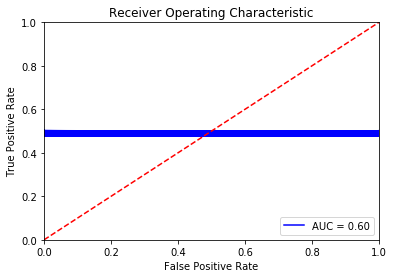

In [0]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(gt_list,pred_list, 'b', label = 'AUC = %0.2f' % roc_auc_score(gt_list,pred_list))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

(64, 64, 3) (64, 64) [[[0.49999973]
  [0.4999887 ]
  [0.4999977 ]
  ...
  [0.49999797]
  [0.5000016 ]
  [0.49999216]]

 [[0.50000596]
  [0.49998257]
  [0.50003624]
  ...
  [0.49997514]
  [0.50000036]
  [0.49999   ]]

 [[0.5000016 ]
  [0.5000381 ]
  [0.50003815]
  ...
  [0.49998915]
  [0.4999855 ]
  [0.4999968 ]]

 ...

 [[0.49925876]
  [0.49939606]
  [0.49894646]
  ...
  [0.49907106]
  [0.49934345]
  [0.49965894]]

 [[0.49956718]
  [0.49939016]
  [0.49873835]
  ...
  [0.49928465]
  [0.49928683]
  [0.49960998]]

 [[0.4999217 ]
  [0.49969742]
  [0.4995056 ]
  ...
  [0.49920887]
  [0.49954093]
  [0.49942425]]]


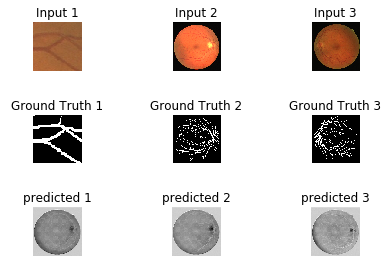

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
#from aug_utils import random_augmentation
from random import randint


def plot_figures(names, figures, nrows = 1, ncols=1):
    """Plot a dictionary of figures.
    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows)
    for ind,title in enumerate(names):
        img = np.squeeze(figures[title])
        if len(img.shape)==2:
            axeslist.ravel()[ind].imshow(img, cmap=plt.gray())#, cmap=plt.gray()
        else:
            axeslist.ravel()[ind].imshow(img)


        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional

    plt.show()


def read_input(path):
    x = Image.open(path)
    return np.array(x)/255.


def read_gt(path):
    y = Image.open(path)
    return np.array(y)/255.


def random_crop(img, mask,pred_1, crop_size=64):
    imgheight= img.shape[0]
    imgwidth = img.shape[1]
    i = randint(0, imgheight-crop_size)
    j = randint(0, imgwidth-crop_size)

    return img[i:(i+crop_size), j:(j+crop_size), :], mask[i:(i+crop_size), j:(j+crop_size)]

figures = {}
gt_1 = read_gt('gdrive/My Drive/DRIVE/test/1st_manual/01_manual1.gif')
img_1 = read_gt('gdrive/My Drive/DRIVE/test/images/01_test.tif')
pred_1 = (pred[0])
img_1, gt_1 = random_crop(img_1, gt_1,pred_1, crop_size = 64)
print(img_1.shape, gt_1.shape, pred_1)
figures['Input 1'] = img_1
figures['Ground Truth 1'] = gt_1
figures['predicted 1'] = pred_1

gt_2 = read_gt('gdrive/My Drive/DRIVE/test/1st_manual/02_manual1.gif')
img_2 = read_gt('gdrive/My Drive/DRIVE/test/images/02_test.tif')
pred_2 = (pred[1])
figures['Input 2'] = img_2
figures['Ground Truth 2'] = gt_2
figures['predicted 2'] = pred_2

gt_3 = read_gt('gdrive/My Drive/DRIVE/test/1st_manual/03_manual1.gif')
img_3 = read_gt('gdrive/My Drive/DRIVE/test/images/03_test.tif')
pred_3 = (pred[2])
figures['Input 3'] = img_3
figures['Ground Truth 3'] = gt_3
figures['predicted 3'] = pred_3
#print(gt_3.shape)



# generation of a dictionary of (title, images)
names = ['Input 1', 'Input 2', 'Input 3', 'Ground Truth 1', 'Ground Truth 2', 'Ground Truth 3','predicted 1','predicted 2','predicted 3']

# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(names, figures, 3,3)

In [0]:
import cv2
import numpy as np
from PIL import Image

image_idx = "01"

gt_path = "gdrive/My Drive/DRIVE/test/1st_manual/%s_manual1.gif"%image_idx
predicted_path = "../output/baseline_unet_aug_do_0.1_activation_ReLU_test/%s_test.tif"%image_idx


gt = np.array(Image.open(gt_path))
predicted = np.array(Image.open(predicted_path))
predicted = (predicted>255/2).astype(int)*255


diff = np.zeros(gt.shape+(3,))
print(diff.shape, gt.shape)

diff[:, :, 0] = gt
diff[:, :, 1] = gt
diff[:, :, 2] = predicted

cv2.imwrite("../output/%s_diff.jpg"%image_idx , diff)

(584, 565, 3) (584, 565)


True

In [0]:
def get_unet(do=0.1, activation=ReLU):
    inputs = Input((None, None, 3))
    conv1 = Dropout(do)(activation()(Conv2D(32, (3, 3), padding='same')(inputs)))
    conv1 = Dropout(do)(activation()(Conv2D(32, (3, 3), padding='same')(conv1)))
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Dropout(do)(activation()(Conv2D(64, (3, 3), padding='same')(pool1)))
    conv2 = Dropout(do)(activation()(Conv2D(64, (3, 3), padding='same')(conv2)))
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Dropout(do)(activation()(Conv2D(128, (3, 3), padding='same')(pool2)))
    conv3 = Dropout(do)(activation()(Conv2D(128, (3, 3), padding='same')(conv3)))
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Dropout(do)(activation()(Conv2D(256, (3, 3), padding='same')(pool3)))
    conv4 = Dropout(do)(activation()(Conv2D(256, (3, 3), padding='same')(conv4)))
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Dropout(do)(activation()(Conv2D(512, (3, 3), padding='same')(pool4)))
    conv5 = Dropout(do)(activation()(Conv2D(512, (3, 3), padding='same')(conv5)))

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Dropout(do)(activation()(Conv2D(256, (3, 3), padding='same')(up6)))
    conv6 = Dropout(do)(activation()(Conv2D(256, (3, 3), padding='same')(conv6)))

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Dropout(do)(activation()(Conv2D(128, (3, 3), padding='same')(up7)))
    conv7 = Dropout(do)(activation()(Conv2D(128, (3, 3), padding='same')(conv7)))

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Dropout(do)(activation()(Conv2D(64, (3, 3), padding='same')(up8)))
    conv8 = Dropout(do)(activation()(Conv2D(64, (3, 3), padding='same')(conv8)))

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Dropout(do)(activation()(Conv2D(32, (3, 3), padding='same')(up9)))
    conv9 = Dropout(do)(activation()(Conv2D(32, (3, 3), padding='same')(conv9)))

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(lr=1e-3), loss=losses.binary_crossentropy, metrics=['accuracy'])


    return model
  
  
   

In [0]:

def get_unet(d0=0.5,activation=ReLU):
    inputs = Input((512,512,3))
    conv1 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = Dropout(d0)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(32, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = Conv2D(32, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = Dropout(d0)(conv5)

    up6 = Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
    UpSampling2D(size=(2, 2))(drop5))
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
    UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([conv3, up7],axis=3)
    conv7 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
    UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([conv2, up8],axis=3)
    conv8 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
    UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, up9],axis=3)
    conv9 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)

    model = Model(input=inputs, output=conv10)

    model.compile(optimizer=SGD(lr=5e-3), loss='binary_crossentropy', metrics=['accuracy'])

    return model